In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           random_state=42,
                           n_clusters_per_class=1,
                           class_sep=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.995
Precision: 0.9896907216494846
Recall: 1.0
F1 Score: 0.9948186528497409


Text(0, 0.5, 'Feature 2')

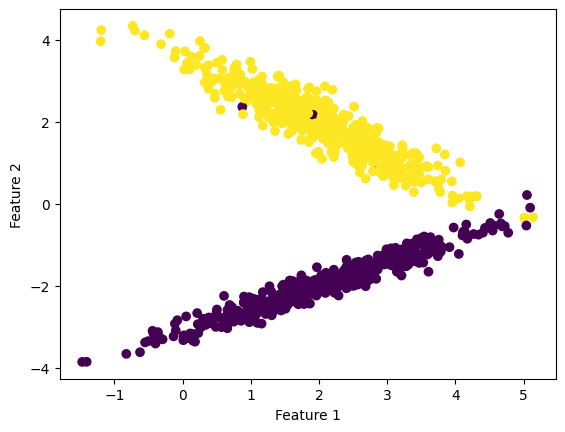

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
print(model.coef_)
print(model.intercept_)

[[-0.07305151  3.25737152]]
[0.54514829]


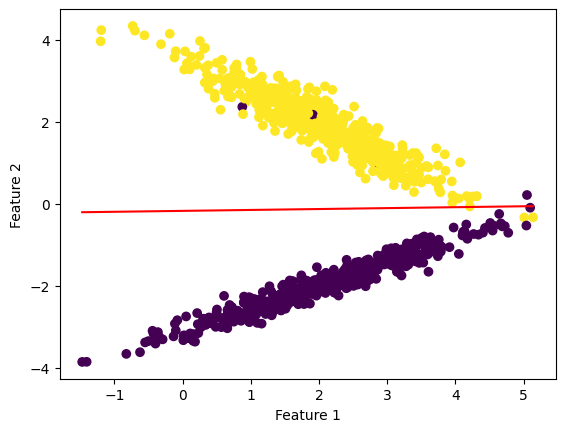

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y_values = -(model.coef_[0][0] * x_values + model.intercept_[0]) / model.coef_[0][1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.plot(x_values, y_values, color='red')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def signed_distance(x, y, model):
    num = model.coef_[0][0] * x + model.coef_[0][1] * y + model.intercept_[0]
    den = np.sqrt(model.coef_[0][0]**2 + model.coef_[0][1]**2)
    return num / den

distances = []
for i in range(len(X)):
    distances.append(signed_distance(X[i][0], X[i][1], model))

distances = np.array(distances)
sigmoid_distances = 1 / (1 + np.exp(-distances))


result_df = pd.DataFrame({'y': y, 'signed_distance': distances, 'sigmoid_distance': sigmoid_distances})

In [ ]:
result_df["pred"] = result_df["sigmoid_distance"]>0.5

In [ ]:
result_df

,y,signed_distance,sigmoid_distance,pred
0,1,2.666135,0.934999,True
1,0,-2.043859,0.114674,False
2,0,-1.833512,0.137820,False
3,0,-0.691001,0.333810,False
4,1,1.915073,0.871588,True
...,...,...,...,...
995,1,1.557741,0.826029,True
996,0,-1.683493,0.156633,False
997,1,1.292112,0.784505,True
998,1,2.764075,0.940703,True


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, result_df["pred"])

0.993

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"KNN Accuracy: {accuracy}")
print(f"KNN Precision: {precision}")
print(f"KNN Recall: {recall}")
print(f"KNN F1 Score: {f1}")

KNN Accuracy: 0.995
KNN Precision: 0.9896907216494846
KNN Recall: 1.0
KNN F1 Score: 0.9948186528497409


In [ ]:
example_point = np.array([[1, 2]])
predicted_class = knn.predict(example_point)
print(f"Predicted class for example point: {predicted_class}")

Predicted class for example point: [1]


In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
def knn(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]
        pred_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(pred_label)
    return np.array(y_pred)

In [ ]:
knn_mauel_pred = knn(X_train, y_train, X_test, 5)

In [ ]:
accuracy = accuracy_score(y_test, knn_mauel_pred)
precision = precision_score(y_test, knn_mauel_pred)
recall = recall_score(y_test, knn_mauel_pred)
f1 = f1_score(y_test, knn_mauel_pred)

print(f"KNN Manuel Accuracy: {accuracy}")
print(f"KNN Manuel Precision: {precision}")
print(f"KNN Manuel Recall: {recall}")
print(f"KNN Manuel F1 Score: {f1}")

KNN Manuel Accuracy: 0.995
KNN Manuel Precision: 0.9896907216494846
KNN Manuel Recall: 1.0
KNN Manuel F1 Score: 0.9948186528497409
